# Functions

In [105]:
%run bidirectional_LSTM_functions.ipynb

# Initialization

In [2]:
ROOT = "C:/Users/Sumi/Desktop/NOTES SEM2/NLP/Internship at RiskConcile/Bidirectiona-LSTM-for-text-summarization--master"

CNN_data= ROOT+'/cnn/'
daily_data= ROOT+'/dailymail/' 

datasets={"cnn":CNN_data,"dailymail":daily_data}

data_categories=["training","validation","test"]

data={"articles":[],"summaries":[]}

# CNN Data Loading
`DeepMind and Q&A Dataset`

Version of the data used in the below code: https://drive.google.com/open?id=1VFKeAZZutQoFi-ARBJ8R0xXJUIdb23Ig

CNN/Daily Mail dataset (Hermann et al., 2015; Nallapati et al., 2016),

### Creating dictionary of articles and summary

Output is a dictionary named 'data' with keys as articles and values as summaries. 
Using only 500 articles from the CNN data and 500 summaries
The articles are cleaned and pre-processed as well.

In [3]:
filenames=load_data(datasets["cnn"],data_categories[0])

"""----------load the data, sentences and summaries-----------"""
for k in range(len(filenames[:400])):
        if k%2==0:
            try:
                data["articles"].append(cleantext(parsetext(datasets["cnn"],data_categories[0],"%s"%filenames[k])))
            except Exception as e:
                data["articles"].append("Could not read")
                print(e)
        else:
            try:
                data["summaries"].append(cleantext(parsetext(datasets["cnn"],data_categories[0],"%s"%filenames[k])))
            except Exception as e:
                data["summaries"].append("Could not read")
                print(e)

del filenames

`Output`
**data** is a dictionary with **keys** 'article' and **values** 'summaries'

# Converting word2vec


In [4]:
############################ initializers ####################################
modelLocation = ROOT + "/TrainedModels/" # Location where trained models are to be saved
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)
emb_size_all = 300
maxcorp=5000

In [5]:
'''
Corpus contains list of words of each sentence in both articles and summaries.
'''
corpus = createCorpus(data)


In [6]:
label_encoder,onehot_encoded,onehot=summonehot(data["summaries"])


3235 unique characters in corpus
2940 unique characters in corpus after max corpus cut


C:\Users\Sumi\Anaconda3\envs\NLP\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [78]:
'''
word2vecmodel function uses the gensim model to train word2vec model 
to convert the unique words in articles and summaries to array/vectors
uses skip_gram model type
'''
model=word2vecmodel(corpus)

model.get_latest_training_loss()

train_data = wordvecmatrix(model,data)

print(len(train_data["article"]), "training articles")
print(len(train_data["summaries"]), "training summaries")

# new_train_data = cutoffSequences(train_data,300,25)
print("After Cutoff:")
print(len(new_train_data["article"]), "training articles")
print(len(new_train_data["summaries"]), "training summaries")

new_train_data["summaries"]=np.array(new_train_data["summaries"])
new_train_data["article"]=np.array(new_train_data["article"])


print("summary size: ",new_train_data["summaries"].shape)
print("article size: ",new_train_data["article"].shape)

# #add start sequence
# train_data["summaries"]=np.array(list(map(addones,train_data["summaries"])))


2019-09-20 11:08:26,324 : INFO : collecting all words and their counts
2019-09-20 11:08:26,326 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-20 11:08:26,400 : INFO : collected 14724 word types from a corpus of 159665 raw words and 7212 sentences
2019-09-20 11:08:26,401 : INFO : Loading a fresh vocabulary
2019-09-20 11:08:26,433 : INFO : min_count=4 retains 4585 unique words (31% of original 14724, drops 10139)
2019-09-20 11:08:26,435 : INFO : min_count=4 leaves 144630 word corpus (90% of original 159665, drops 15035)
2019-09-20 11:08:26,486 : INFO : deleting the raw counts dictionary of 14724 items
2019-09-20 11:08:26,488 : INFO : sample=0.001 downsamples 40 most-common words
2019-09-20 11:08:26,490 : INFO : downsampling leaves estimated 100989 word corpus (69.8% of prior 144630)
2019-09-20 11:08:26,526 : INFO : estimated required memory for 4585 words and 300 dimensions: 13296500 bytes
2019-09-20 11:08:26,528 : INFO : resetting layer weights
2019-0

2019-09-20 11:08:41,547 : INFO : EPOCH 7 - PROGRESS: at 79.56% examples, 83329 words/s, in_qsize 6, out_qsize 1
2019-09-20 11:08:41,873 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-20 11:08:41,873 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-20 11:08:41,873 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-20 11:08:41,873 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-20 11:08:41,873 : INFO : EPOCH - 7 : training on 159665 raw words (100825 effective words) took 1.3s, 75456 effective words/s
2019-09-20 11:08:42,928 : INFO : EPOCH 8 - PROGRESS: at 76.21% examples, 79242 words/s, in_qsize 2, out_qsize 3
2019-09-20 11:08:43,219 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-20 11:08:43,219 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-20 11:08:43,235 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-

2019-09-20 11:08:58,857 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-20 11:08:58,857 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-20 11:08:58,873 : INFO : EPOCH - 20 : training on 159665 raw words (101093 effective words) took 1.3s, 80114 effective words/s
2019-09-20 11:08:59,878 : INFO : EPOCH 21 - PROGRESS: at 73.78% examples, 76767 words/s, in_qsize 5, out_qsize 2
2019-09-20 11:09:00,282 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-09-20 11:09:00,282 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-09-20 11:09:00,282 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-09-20 11:09:00,297 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-09-20 11:09:00,297 : INFO : EPOCH - 21 : training on 159665 raw words (101034 effective words) took 1.4s, 71235 effective words/s
2019-09-20 11:09:01,329 : INFO : EPOCH 22 - PROGRESS: at 76.71% example


progress: 50.0
progress: 100.0

200 training articles
200 training summaries
After Cutoff:
167 training articles
167 training summaries
summary size:  (167, 25, 300)
article size:  (167, 300, 300)


# Using LSTM sequence to sequence model for text summarization

## References:

https://keras.io/examples/lstm_seq2seq/

https://github.com/DeepsMoseli/Bidirectiona-LSTM-for-text-summarization-

https://machinelearningmastery.com/encoder-decoder-models-text-summarization-keras/


## Encoder Decoder model using LSTM Seq2Seq

In [108]:
####################### model params ###########################
batch_size = 100
num_classes = 1
epochs = 100
hidden_units = emb_size_all
learning_rate = 0.002
clip_norm = 1.0

###############################################################
en_shape=np.shape(new_train_data["article"][0])
de_shape=np.shape(new_train_data["summaries"][0])


In [109]:
ROOT = 'C:/Users/Sumi/Desktop/NOTES SEM2/NLP/Internship at RiskConcile/Bidirectiona-LSTM-for-text-summarization--master'

'''
LSTM Encoder decoder model is trained and loaded.
'''
lstm_trained_model,encoder,decoder,history = encoder_decoder(new_train_data)

lstm_trained_model.save(ROOT + '/TrainedModels/' + str(epochs) +'_epochs_enc_dec_cnn.h5')
encoder.save(ROOT + '/TrainedModels/'+ str(epochs) +'_epochs_encoder_cnn.h5')
decoder.save(ROOT + '/TrainedModels/'+ str(epochs) +'_epochs_decoder_cnn.h5')


Encoder_Decoder LSTM...


C:\Users\Sumi\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, return_state=True, dropout=0.2, recurrent_dropout=0.2)`
  import sys


Train on 133 samples, validate on 34 samples
Epoch 1/100
133/133 [==============================] - 25s 184ms/step - loss: 0.0516 - acc: 0.0072 - val_loss: 0.0539 - val_acc: 0.0059
Epoch 2/100
133/133 [==============================] - 19s 146ms/step - loss: 0.0519 - acc: 0.0096 - val_loss: 0.0395 - val_acc: 0.0247
Epoch 3/100
133/133 [==============================] - 21s 155ms/step - loss: 0.0398 - acc: 0.0319 - val_loss: 0.0368 - val_acc: 0.0341
Epoch 4/100
133/133 [==============================] - 22s 168ms/step - loss: 0.0372 - acc: 0.0436 - val_loss: 0.0354 - val_acc: 0.0435
Epoch 5/100
133/133 [==============================] - 23s 174ms/step - loss: 0.0358 - acc: 0.0526 - val_loss: 0.0346 - val_acc: 0.0565
Epoch 6/100
133/133 [==============================] - 23s 175ms/step - loss: 0.0349 - acc: 0.0571 - val_loss: 0.0337 - val_acc: 0.0612
Epoch 7/100
133/133 [==============================] - 23s 170ms/step - loss: 0.0338 - acc: 0.0611 - val_loss: 0.0325 - val_acc: 0.0612
Epo

133/133 [==============================] - 22s 168ms/step - loss: 0.0031 - acc: 0.6493 - val_loss: 0.0038 - val_acc: 0.6047
Epoch 61/100
133/133 [==============================] - 25s 189ms/step - loss: 0.0029 - acc: 0.6289 - val_loss: 0.0037 - val_acc: 0.6165
Epoch 62/100
133/133 [==============================] - 26s 193ms/step - loss: 0.0028 - acc: 0.6544 - val_loss: 0.0037 - val_acc: 0.6094
Epoch 63/100
133/133 [==============================] - 27s 205ms/step - loss: 0.0028 - acc: 0.6626 - val_loss: 0.0038 - val_acc: 0.6059
Epoch 64/100
133/133 [==============================] - 29s 215ms/step - loss: 0.0029 - acc: 0.6400 - val_loss: 0.0040 - val_acc: 0.5459
Epoch 65/100
133/133 [==============================] - 28s 208ms/step - loss: 0.0030 - acc: 0.6319 - val_loss: 0.0037 - val_acc: 0.5965
Epoch 66/100
133/133 [==============================] - 26s 199ms/step - loss: 0.0028 - acc: 0.6641 - val_loss: 0.0034 - val_acc: 0.6329
Epoch 67/100
133/133 [==============================] 

**Comments:** 
The model ran for around 1 hour for 100 epochs
System specification: 8GB RAM, 64bit Windows OS, i5 processor

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


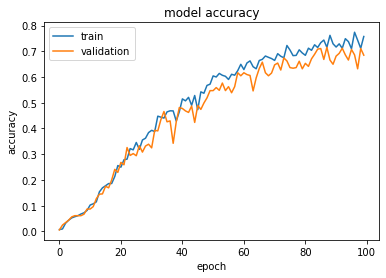

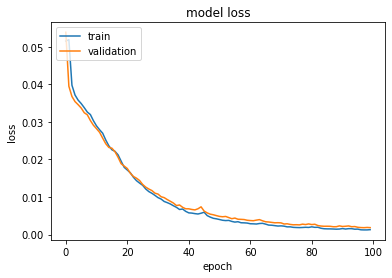

In [110]:
plot_training(history)

## Loading saved Enc-Dec model

In [111]:
# # Loading saved model
# lstm_trained_model = load_model(ROOT+'/TrainedModels/'+'100_epochs_enc_dec_cnn.h5')
# print("Model loaded successfully.")


## Predict Summary using the LSTM Model

In [112]:
evaluate_summ(10)

-----------------------------------------------------
Original summary
 hawaiian airlines again lands at no . in on time performance . the airline quality rankings report looks at the
-----------------------------------------------------
Generated summary
belts beating beating beating beating beating beating beating beating beating beating beating beating beating america america america america america america america avoid avoid avoid avoid 
-----------------------------------------------------


# Sentiment Analysis with AFINN Lexicon

data['articles'] and data['summaries'] -  used further for sentiment analysis
Original articles with generated summaries.

In [25]:
'''
Assigning scores to the articles and generated summaries based on AFINN lexicon Method
'''

####################
from afinn import Afinn
af = Afinn()

arti_score = []
 
for article in data['articles']:
    word_cnt = word_count(article)
    arti_score.append(af.score(article)/word_cnt)

summ_score = []
for summary in data['summaries']:
    word_cnt = word_count(summary)
    summ_score.append(af.score(summary)/word_cnt)


In [26]:
'''
Defining the sentiments to be POSITIVE / NEGATIVE / NEUTRAL
'''

#####################
article_sentiment_category = [2 if score > 0 
                          else 1 if score < 0 
                              else 0 
                                  for score in arti_score]

summ_sentiment_category = [2 if score > 0 
                          else 1 if score < 0 
                              else 0 
                                  for score in summ_score]

## Histogram of Sentiments

In [27]:
'''
Creating dataframe with articles and summary with their sentiment scores
'''

index = range(len(arti_score))
df = pd.DataFrame([index,arti_score, article_sentiment_category,summ_score,summ_sentiment_category]).T
df.columns = ['article_number','article_sentiment_score', 'article_sentiment_category','summary_sentiment_score', 'summary_sentiment_category']
df['article_sentiment_score'] = df.article_sentiment_score.astype('float')
df['summary_sentiment_score'] = df.summary_sentiment_score.astype('float')
df.head()


,article_number,article_sentiment_score,article_sentiment_category,summary_sentiment_score,summary_sentiment_category
0,0.0,-0.030882,1.0,0.079365,2.0
1,1.0,0.054636,2.0,0.297297,2.0
2,2.0,0.018198,2.0,0.042553,2.0
3,3.0,-0.097303,1.0,-0.183333,1.0
4,4.0,-0.200000,1.0,-0.236842,1.0


Text(0.5, 1.0, 'Diving AFINN scores by No. of Words')

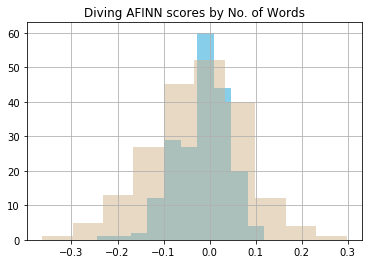

In [36]:
'''
Plotting Histogram
'''

df['article_sentiment_score'].hist(label='Article',stacked=True,color = 'skyblue')
df['summary_sentiment_score'].hist(label='Summary',stacked=True, color = 'tan',alpha=0.5)
plt.title('Diving AFINN scores by No. of Words')

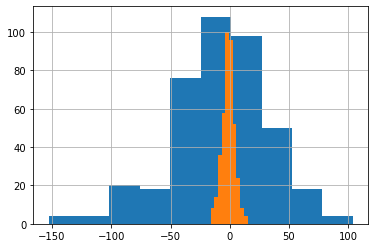

In [531]:
'''
Plotting Histogram
'''

df['article_sentiment_score'].hist(label='Article',stacked=True)
df['summary_sentiment_score'].hist(label='Summary',stacked=True)


Text(0, 0.5, 'Density')

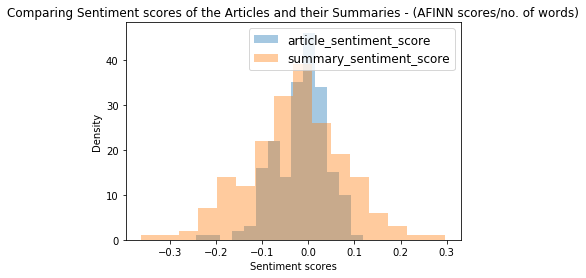

In [37]:
import seaborn as sns

sns.distplot(df['article_sentiment_score'],  kde=False, label='article_sentiment_score')
sns.distplot(df['summary_sentiment_score'],  kde=False, label='summary_sentiment_score')
plt.legend(prop={'size': 12})
plt.title('Comparing Sentiment scores of the Articles and their Summaries - (AFINN scores/no. of words)')
plt.xlabel('Sentiment scores')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

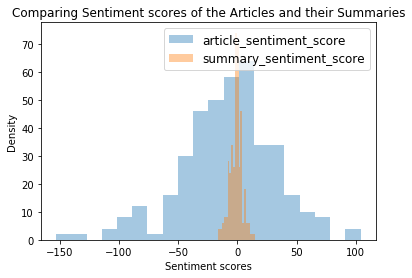

In [542]:
import seaborn as sns

sns.distplot(df['article_sentiment_score'],  kde=False, label='article_sentiment_score')
sns.distplot(df['summary_sentiment_score'],  kde=False, label='summary_sentiment_score')
plt.legend(prop={'size': 12})
plt.title('Comparing Sentiment scores of the Articles and their Summaries')
plt.xlabel('Sentiment scores')
plt.ylabel('Density')

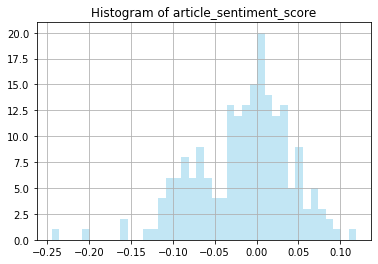

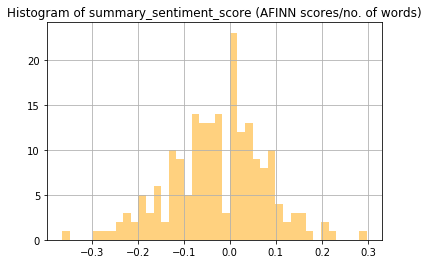

In [38]:
df.hist(column = 'article_sentiment_score', bins = 40, color = 'skyblue', alpha = 0.5)
plt.title('Histogram of article_sentiment_score')
df.hist(column = 'summary_sentiment_score', bins = 40, color = 'orange', alpha = 0.5)
plt.title('Histogram of summary_sentiment_score (AFINN scores/no. of words)')
plt.show()

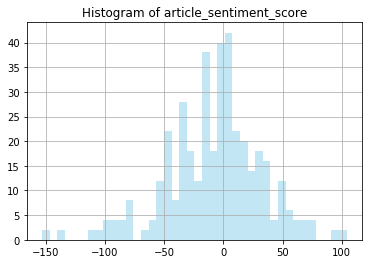

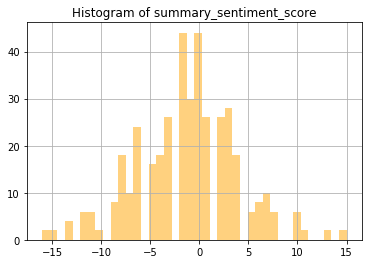

In [546]:
df.hist(column = 'article_sentiment_score', bins = 40, color = 'skyblue', alpha = 0.5)
plt.title('Histogram of article_sentiment_score')
df.hist(column = 'summary_sentiment_score', bins = 40, color = 'orange', alpha = 0.5)
plt.title('Histogram of summary_sentiment_score')
plt.show()

## Scatter Plot of Article vs Summary Sentiment scores

Text(0.5, 1.0, '(AFINN scores/no. of words)')

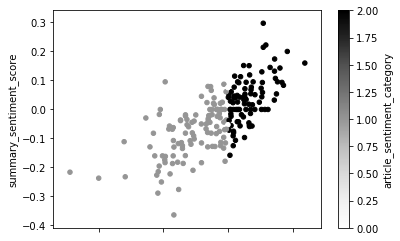

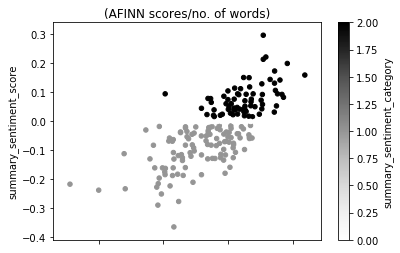

In [39]:
'''
Scatter Plots to compare the sentiment score variation of Article and Summary 
'''

ax1 = df.plot.scatter(x='article_sentiment_score',y='summary_sentiment_score',c='article_sentiment_category')
ax2 = df.plot.scatter(x='article_sentiment_score',y='summary_sentiment_score',c='summary_sentiment_category')
plt.title('(AFINN scores/no. of words)')

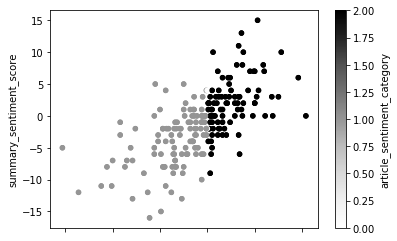

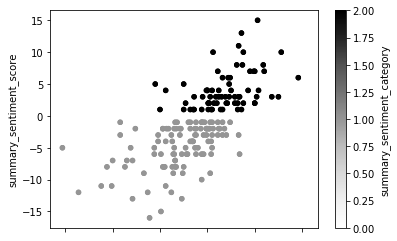

In [572]:
'''
Scatter Plots to compare the sentiment score variation of Article and Summary 
'''

ax1 = df.plot.scatter(x='article_sentiment_score',y='summary_sentiment_score',c='article_sentiment_category')
ax2 = df.plot.scatter(x='article_sentiment_score',y='summary_sentiment_score',c='summary_sentiment_category')